# SPNC development and testing

*This is a notebook for testing and development of ideas*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants

## Define our magnetic system

In [2]:
# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

In [3]:
# General rate equation
def SPNC_rate(f0,ebarrier,temp):

    w = f0*np.exp(-ebarrier/(constants.k*temp))

    return w

In [4]:
# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

In [5]:
def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

In [6]:
def SPNC_mag_evolver_sw(beta_prime,h_primes,t_prime):
    
    time = np.zeros(h_primes.shape[0]+1)
    mag = np.zeros(h_primes.shape[0]+1)
    time[0] = 0
    mag[0] = 0
    
    for i in range(len(time)-1):
        
        time[i+1] =  time[i] + t_prime
        mag[i+1] = SPNC_magnetisation_sw(beta_prime,h_primes[i],mag[i],t_prime)
        
    return time, mag    

## Some testing

### Excitation from zero m

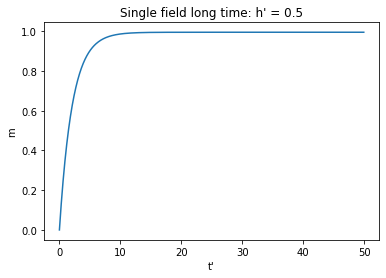

In [7]:
time_prime = np.arange(0,50,0.1)

plt.plot(time_prime,SPNC_magnetisation_sw(3,0.5,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Single field long time: h' = 0.5")
plt.show()

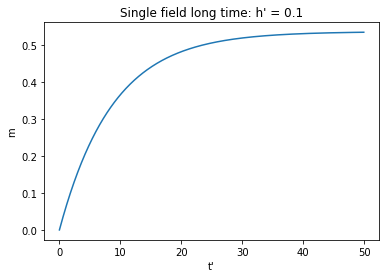

In [8]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.1,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Single field long time: h' = 0.1")
plt.show()

#### Long time excitation

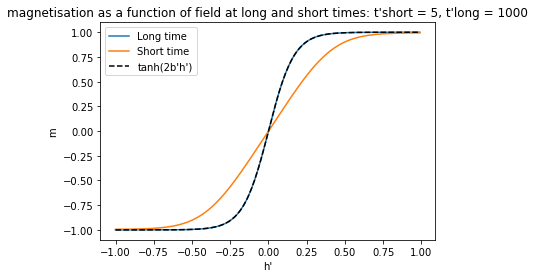

In [9]:
h_primes = np.arange(-1,1,0.01)

plt.plot(h_primes,SPNC_magnetisation_sw(3,h_primes,0,1000))
plt.plot(h_primes,SPNC_magnetisation_sw(3,h_primes,0,5))
plt.plot(h_primes,np.tanh(2*3*h_primes),'k--')
plt.xlabel("h'")
plt.ylabel('m')
plt.legend(['Long time','Short time',"tanh(2b'h')"])
plt.title("magnetisation as a function of field at long and short times: t'short = 5, t'long = 1000")
plt.show()

We can see that the output field matches exactly the expected tanh function when in the limit of long time (dotted is tanh, blue is long time, orange is short time)

### Decay from m

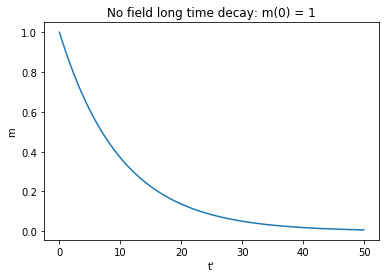

In [10]:
time_prime = np.arange(0,50,0.1)

plt.plot(time_prime,SPNC_magnetisation_sw(3,0,1,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("No field long time decay: m(0) = 1")
plt.show()

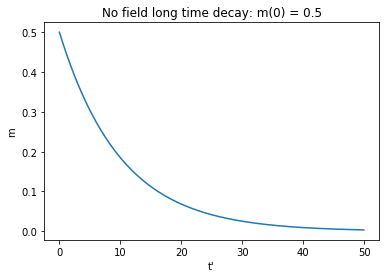

In [11]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("No field long time decay: m(0) = 0.5")
plt.show()

The same decay length is seen regardless of the starting m(0) provided the applied field (here zero) is the same

#### Decay with field

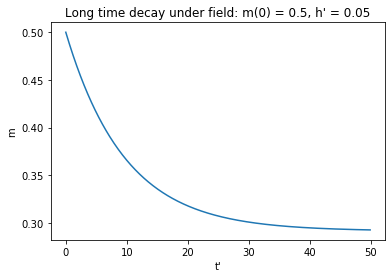

In [12]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.05,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Long time decay under field: m(0) = 0.5, h' = 0.05")
plt.show()

#### Excitation from starting m(0)

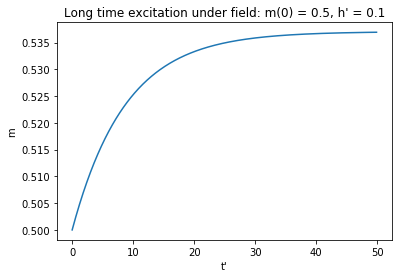

In [13]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.1,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Long time excitation under field: m(0) = 0.5, h' = 0.1")
plt.show()

We see here that changing from $h' = 0.05$ to $h' = 0.1$ results in a change from decay down to a new value to exitation up to a new one

### Successive field inputs (memory and non-linearity)

Here we use time_prime as a time step between inputs. A combination of beta and the time step sets the "memory"

#### First let's examine the case where $0 \le h' \le 1$

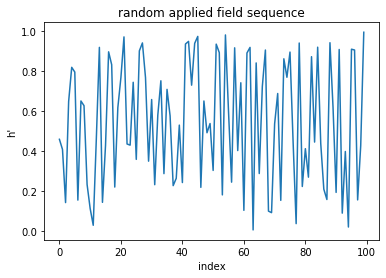

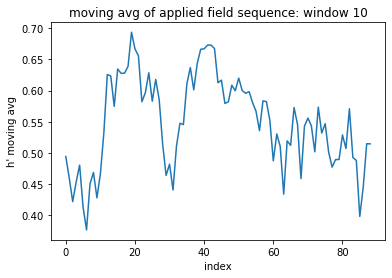

In [14]:
h_primes = np.random.rand(100)

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

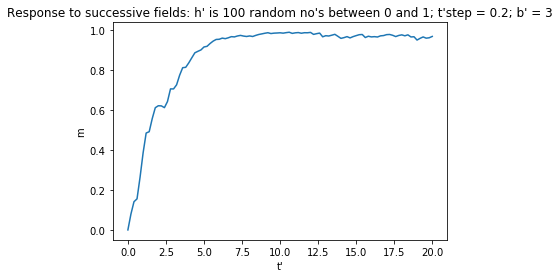

In [15]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 0.2; b' = 3")
plt.show()

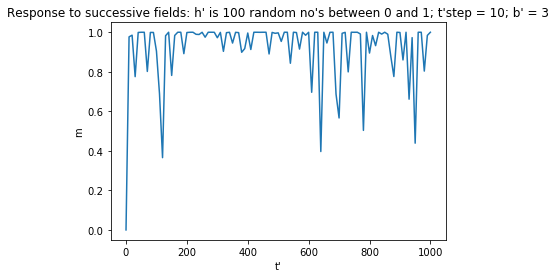

In [16]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 10; b' = 3")
plt.show()

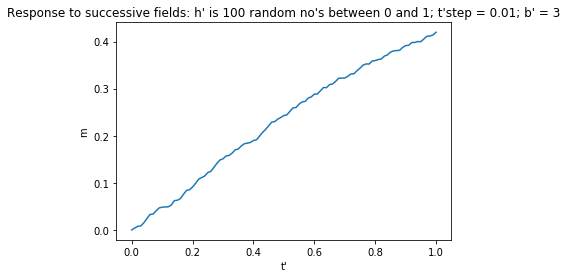

In [17]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 0.01; b' = 3")
plt.show()

We can see that we run into problems of saturating our system, so let us change our bounds on $h'$

####  $-1 \le h' \le 1$

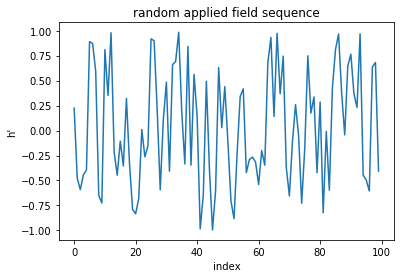

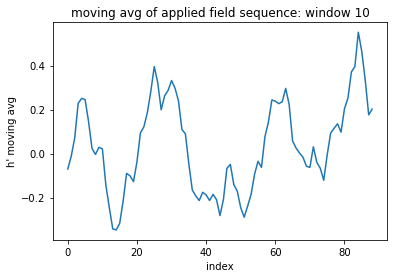

In [38]:
h_primes = 2 * np.random.rand(100) - 1

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

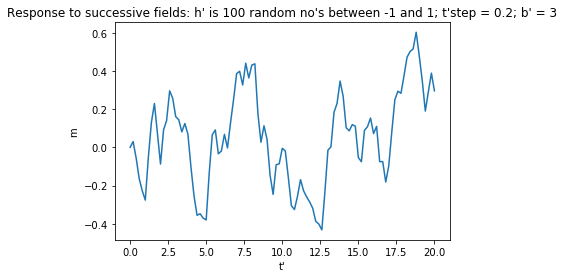

In [39]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 0.2; b' = 3")
plt.show()

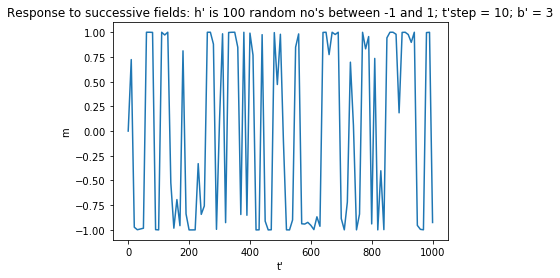

In [40]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 10; b' = 3")
plt.show()

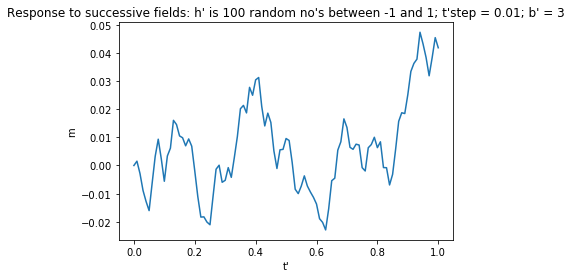

In [41]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 0.01; b' = 3")
plt.show()

#### Re-looking at the positive case, but $0 \le h' \le 0.25$ and longer time base

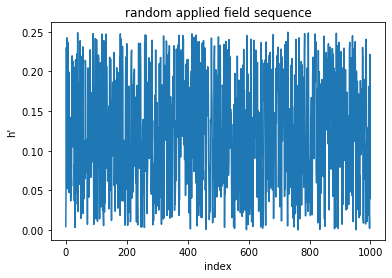

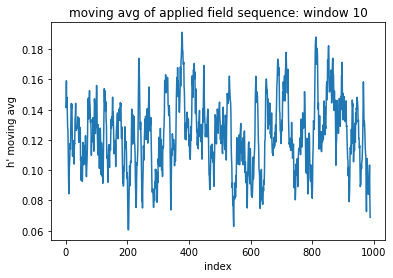

In [34]:
h_primes = np.random.rand(1000)/4

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

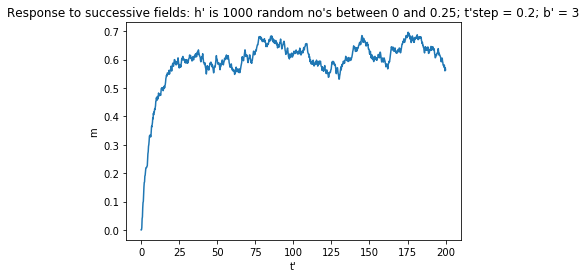

In [35]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 0.2; b' = 3")
plt.show()

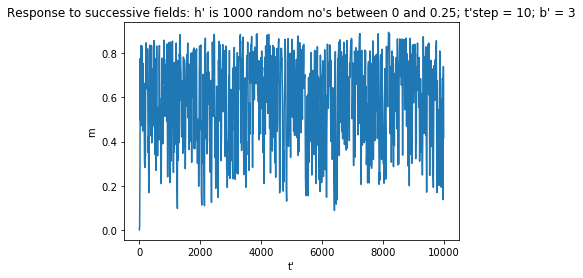

In [36]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 10; b' = 3")
plt.show()

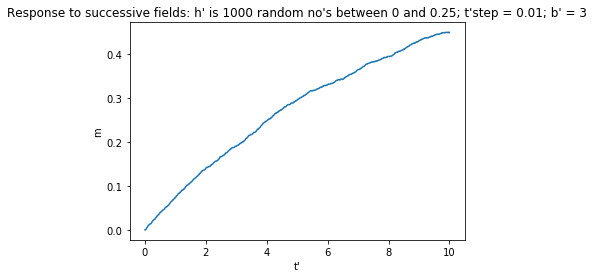

In [37]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 0.01; b' = 3")
plt.show()

We see that the behaviour looks kind of like it is intergrating the average, with noise from the deviation. The time scale sets how much the noise effects it and how long the averaging takes. Let's take a look at this by finding the expected result from the average input:

h_prime average = 0.03603417295422498


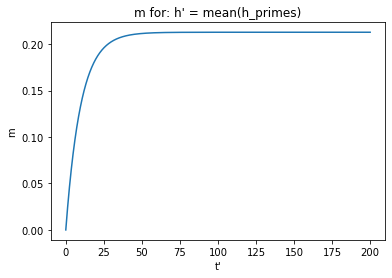

In [53]:
h_prime_avg = np.mean(h_primes)
print("h_prime average =", h_prime_avg)
total_time = 0.2 * 1000 #time step times number of points

time_prime = np.arange(0,total_time,0.1)
plt.plot(time_prime,SPNC_magnetisation_sw(3,h_prime_avg,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("m for: h' = mean(h_primes)")
plt.show()

Based on this, it looks a little more complicated that straight up averaging. Perhaps is averaging over a window? 